<a href="https://colab.research.google.com/github/sarahf123/sfd-356/blob/main/loan_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data collection n pre processing

In [133]:
#reading data from csv file to pandas dataframe
loan_data=pd.read_csv("/content/loan_data_set.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [134]:
loan_dataframe=pd.DataFrame(loan_data)
print(loan_dataframe)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [135]:
#displaying tail elements
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [136]:
#displaying head elements
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
#get info about the data
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [138]:
#finding no. of rows and columns using shape()
loan_data.shape

(614, 13)

In [139]:
#getting statistical/numerical measures about the data
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data cleaning
Checking for missing values

In [140]:
#checking data set has any null values/missing values in each column
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Handling missing values:

In [141]:
#we'll fill missing values in 'LoanAmount' and 'Credit_History' by mean and median of resp. variables
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean())
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].median())

In [142]:
#now check for any missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
#now let's drop all the remaining missing values (for the columns that have null values)
loan_data.dropna(inplace=True)

In [144]:
#check missing values for the last time
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have dropped all the missing values to avoid any disturbances in the model.

In [145]:
#checking the final dataset shape
loan_data.shape

(542, 13)

Exploratory Data Analysis
Comparison between Parameters for getting a LOAN:

In [146]:
#data visualization

Text(0.5, 1.0, 'gender vs loan_status')

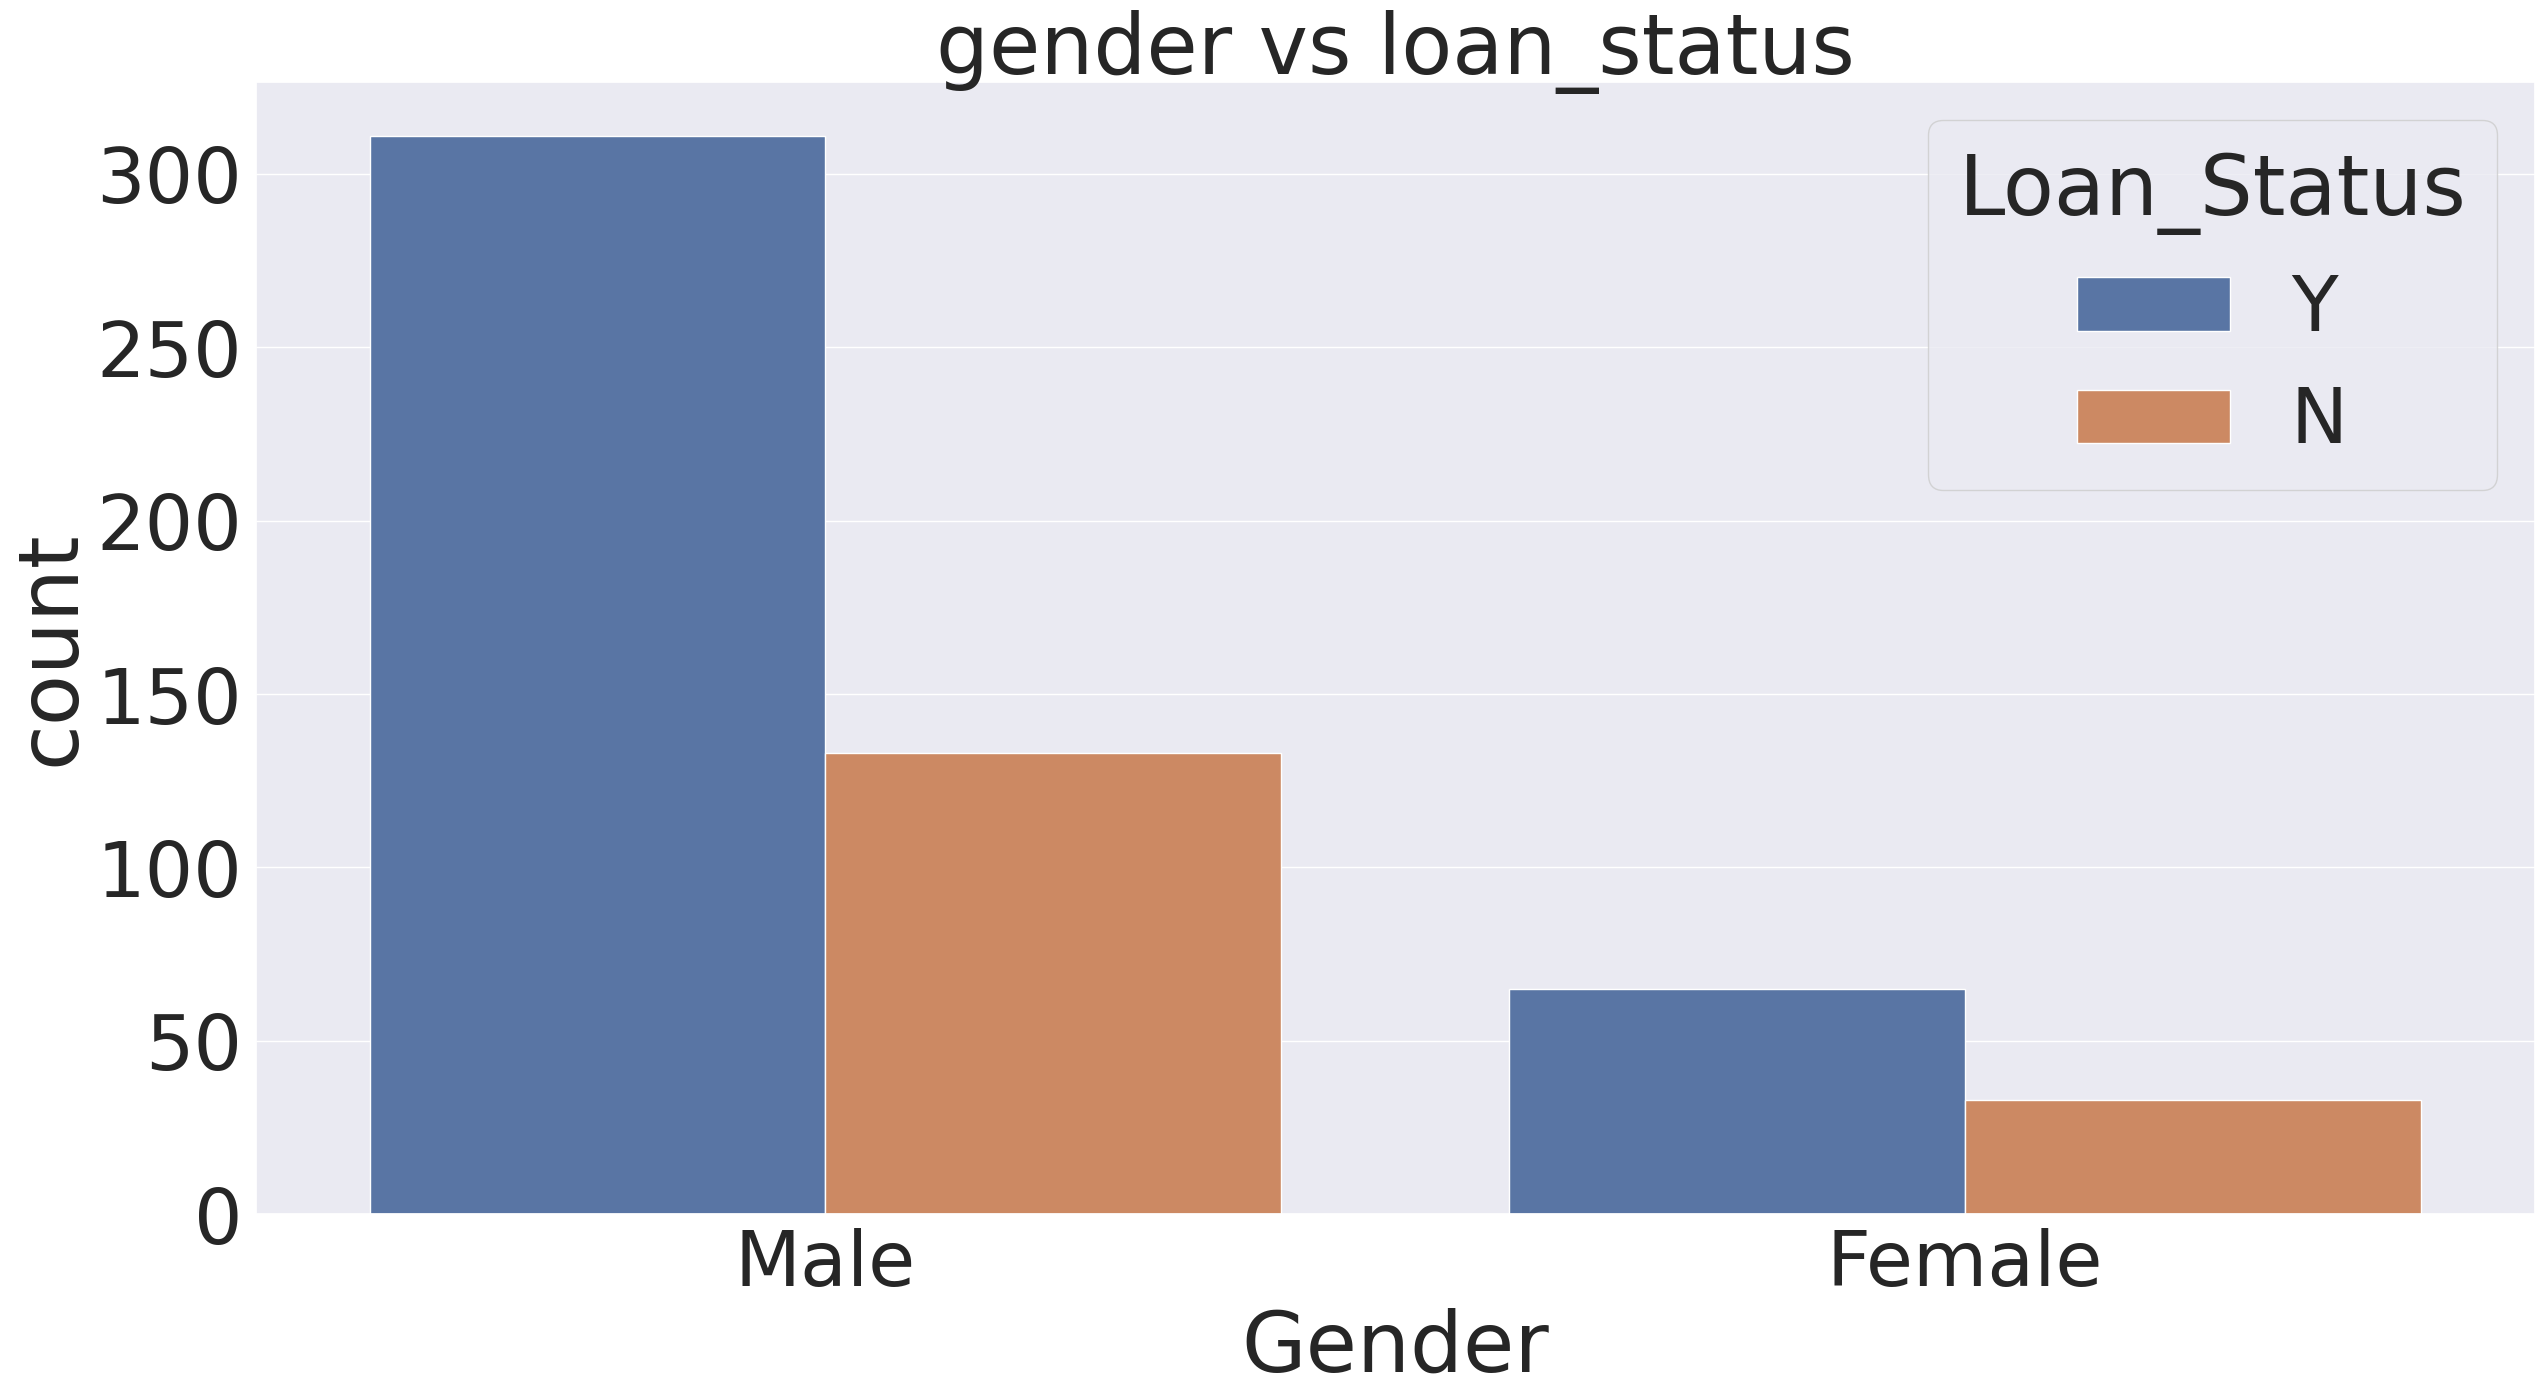

In [147]:
#making a countplot for gender column
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data)
plt.title("gender vs loan_status")

Text(0.5, 1.0, 'married vs loan_status')

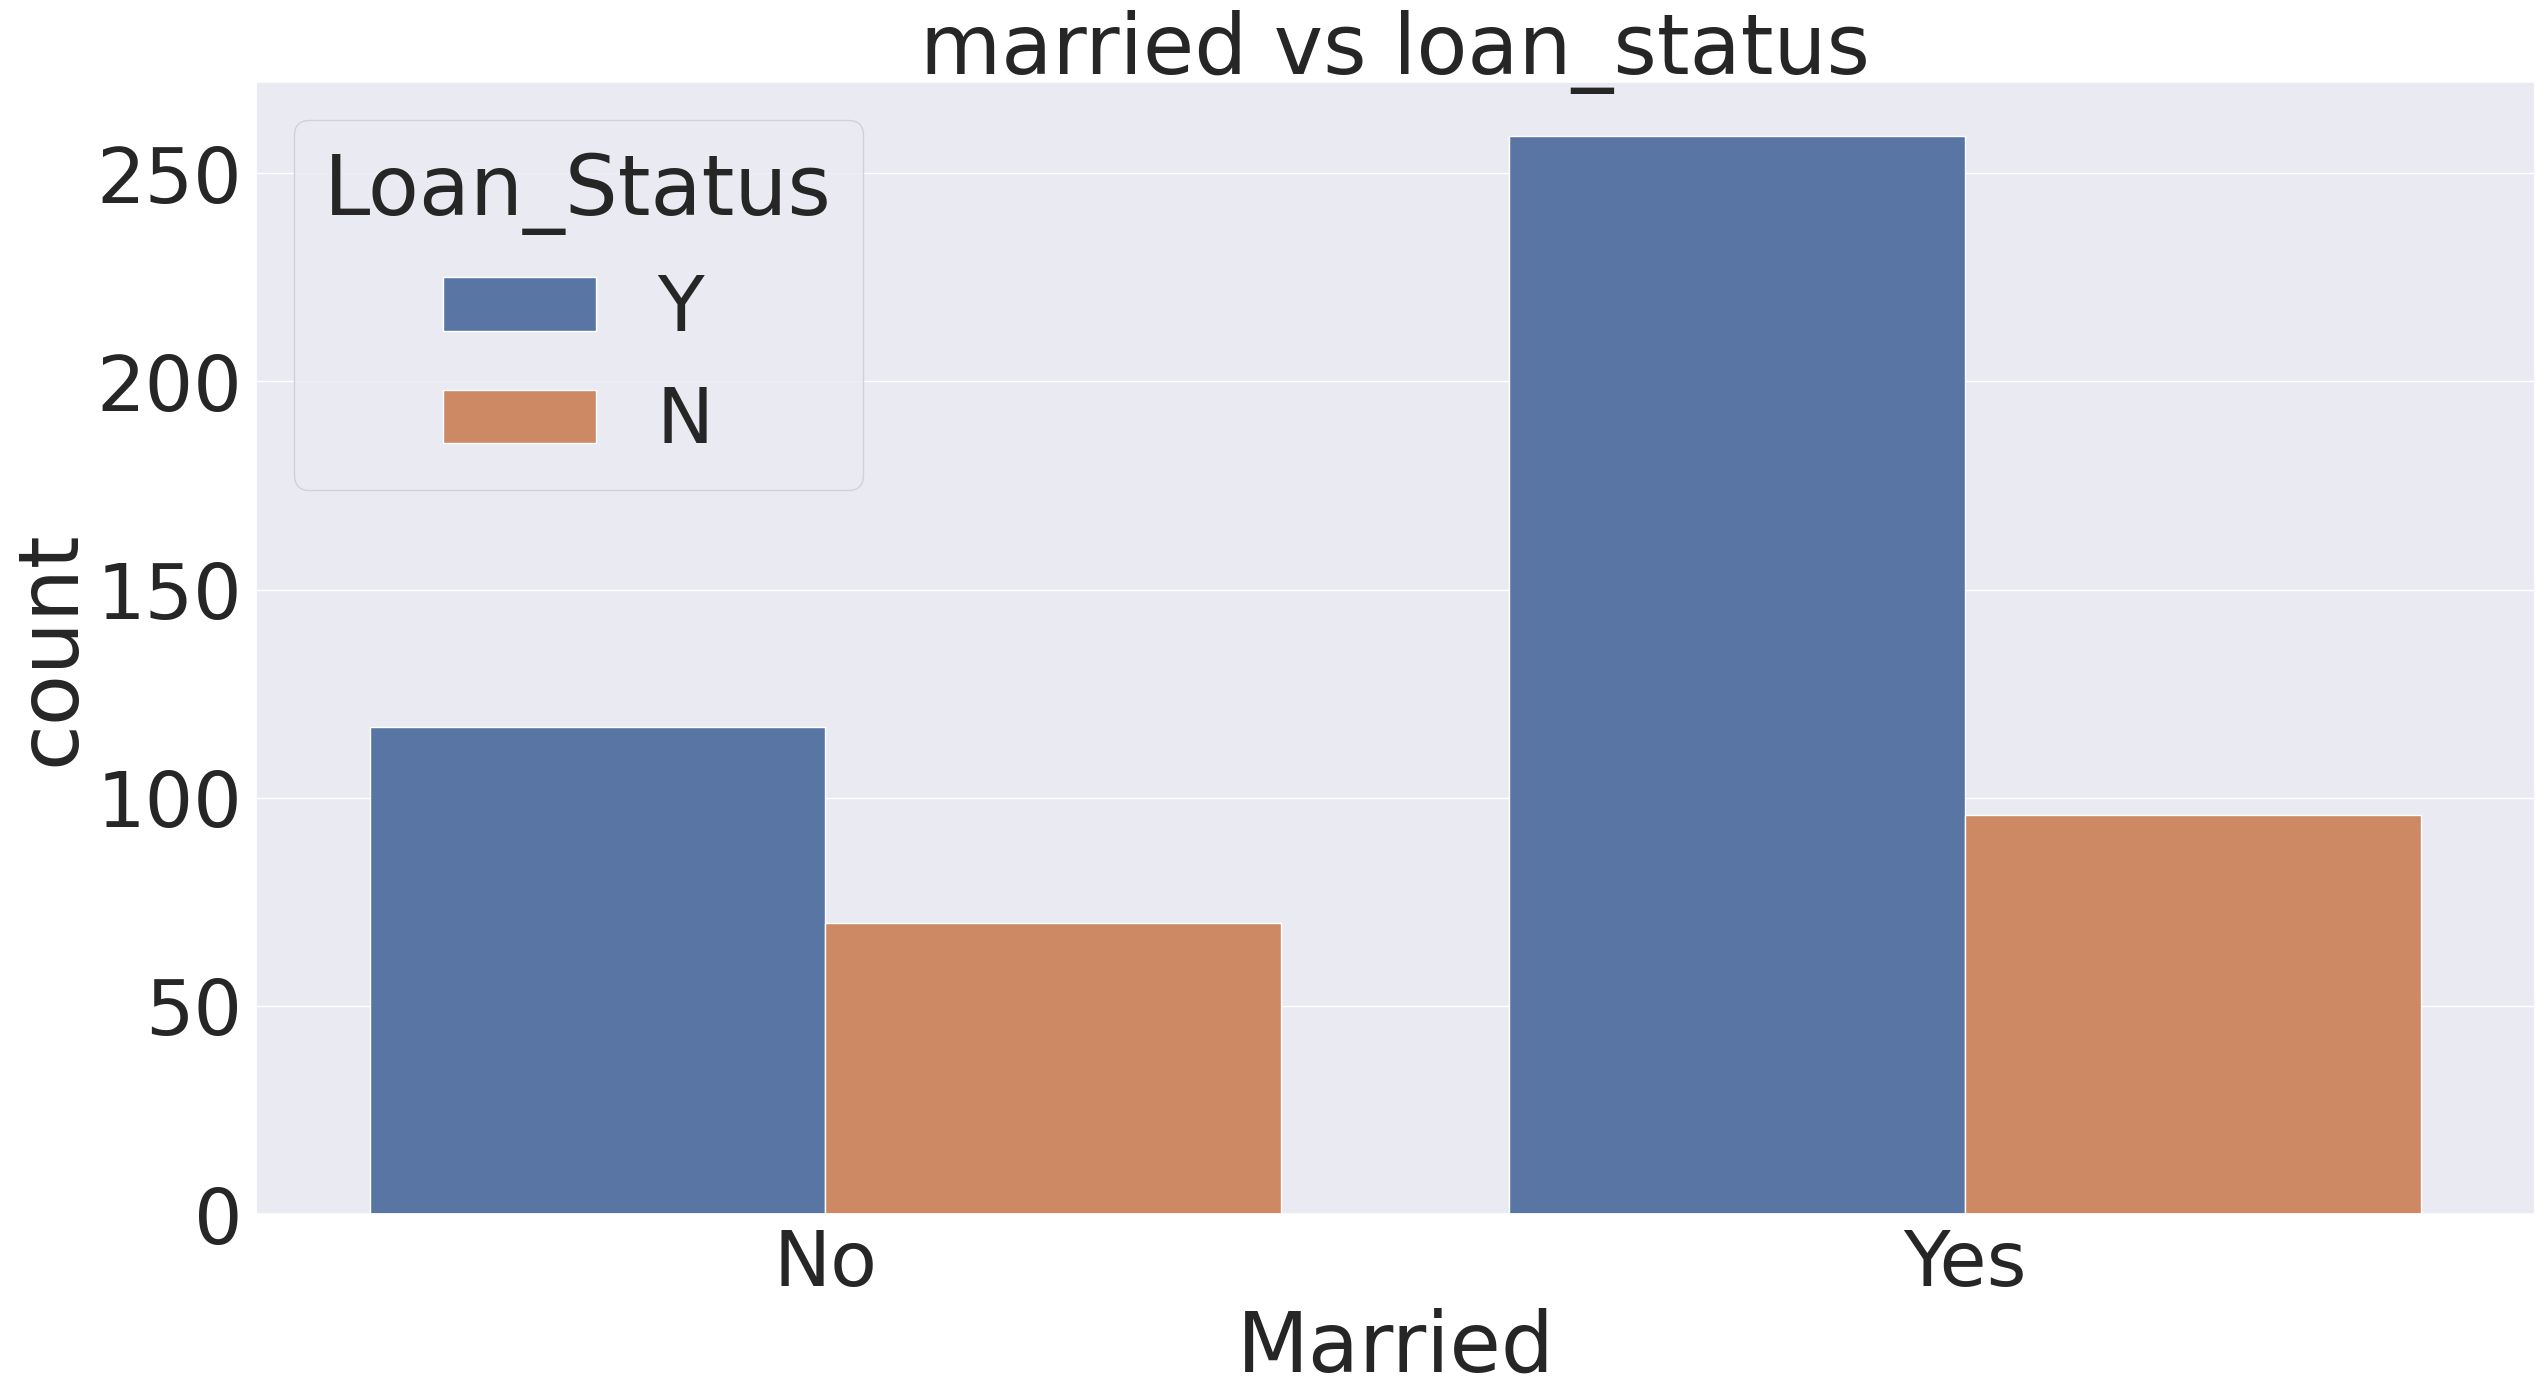

In [148]:
#
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)
plt.title("married vs loan_status")

Text(0.5, 1.0, 'education vs loan_status')

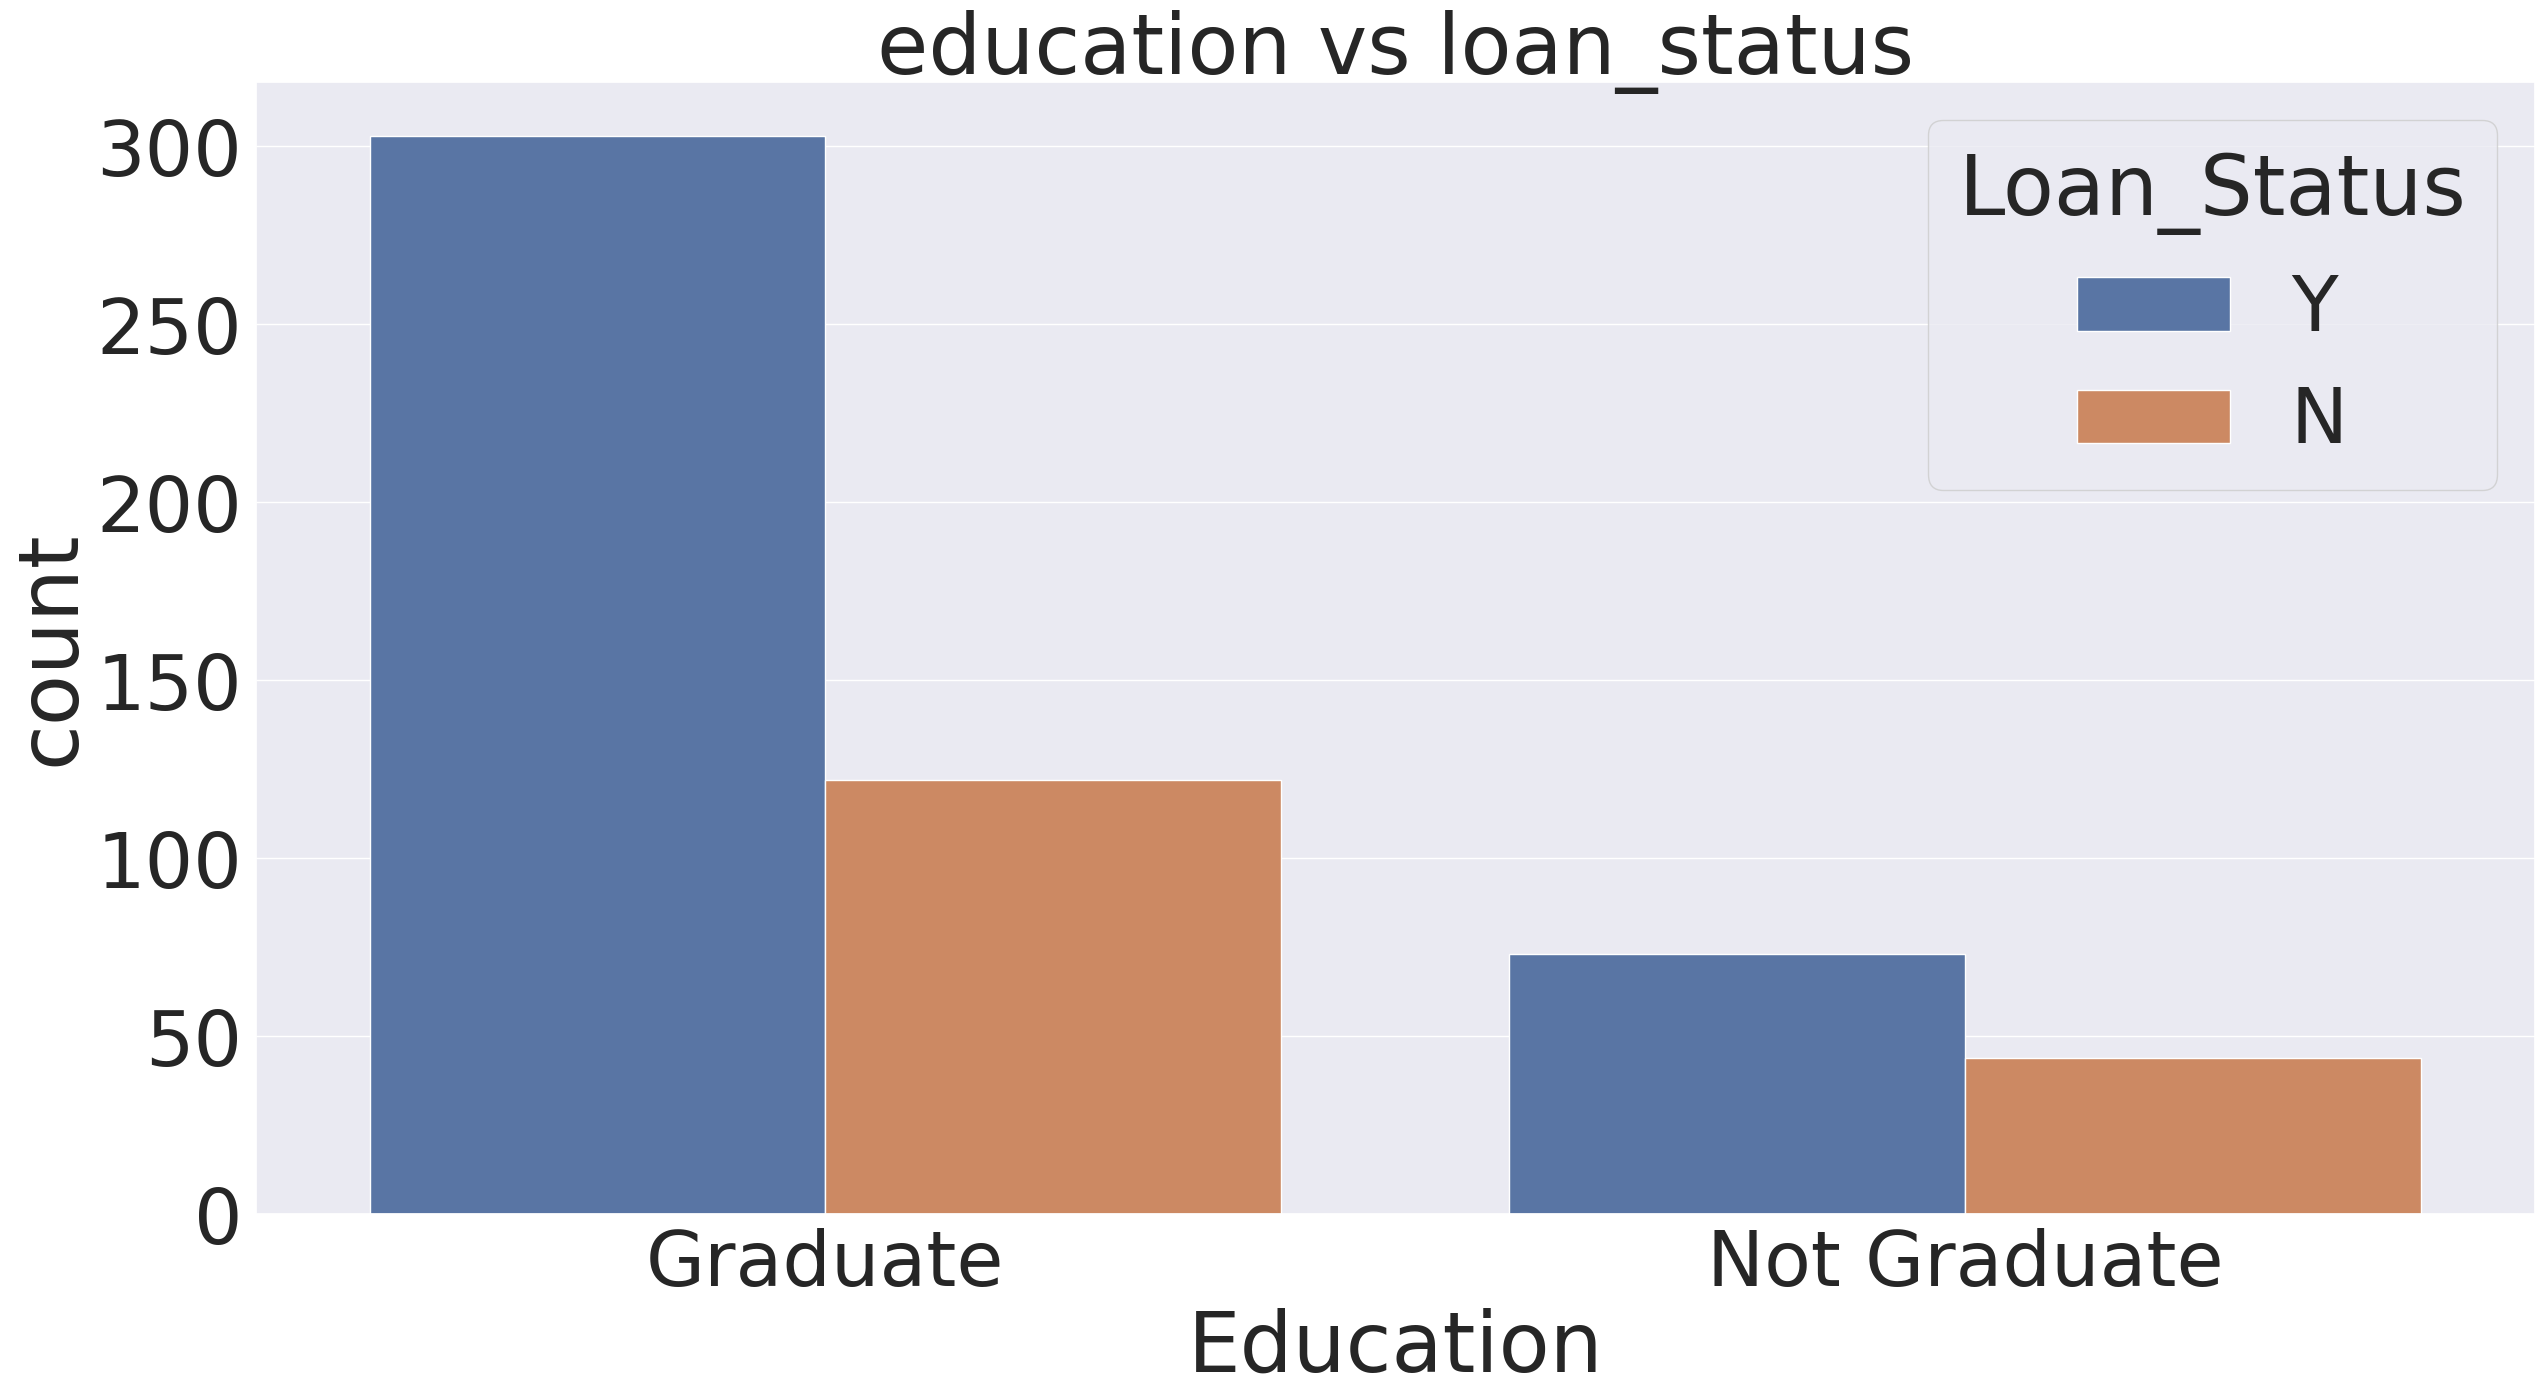

In [149]:
#
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)
plt.title("education vs loan_status")

<Axes: xlabel='Self_Employed', ylabel='count'>

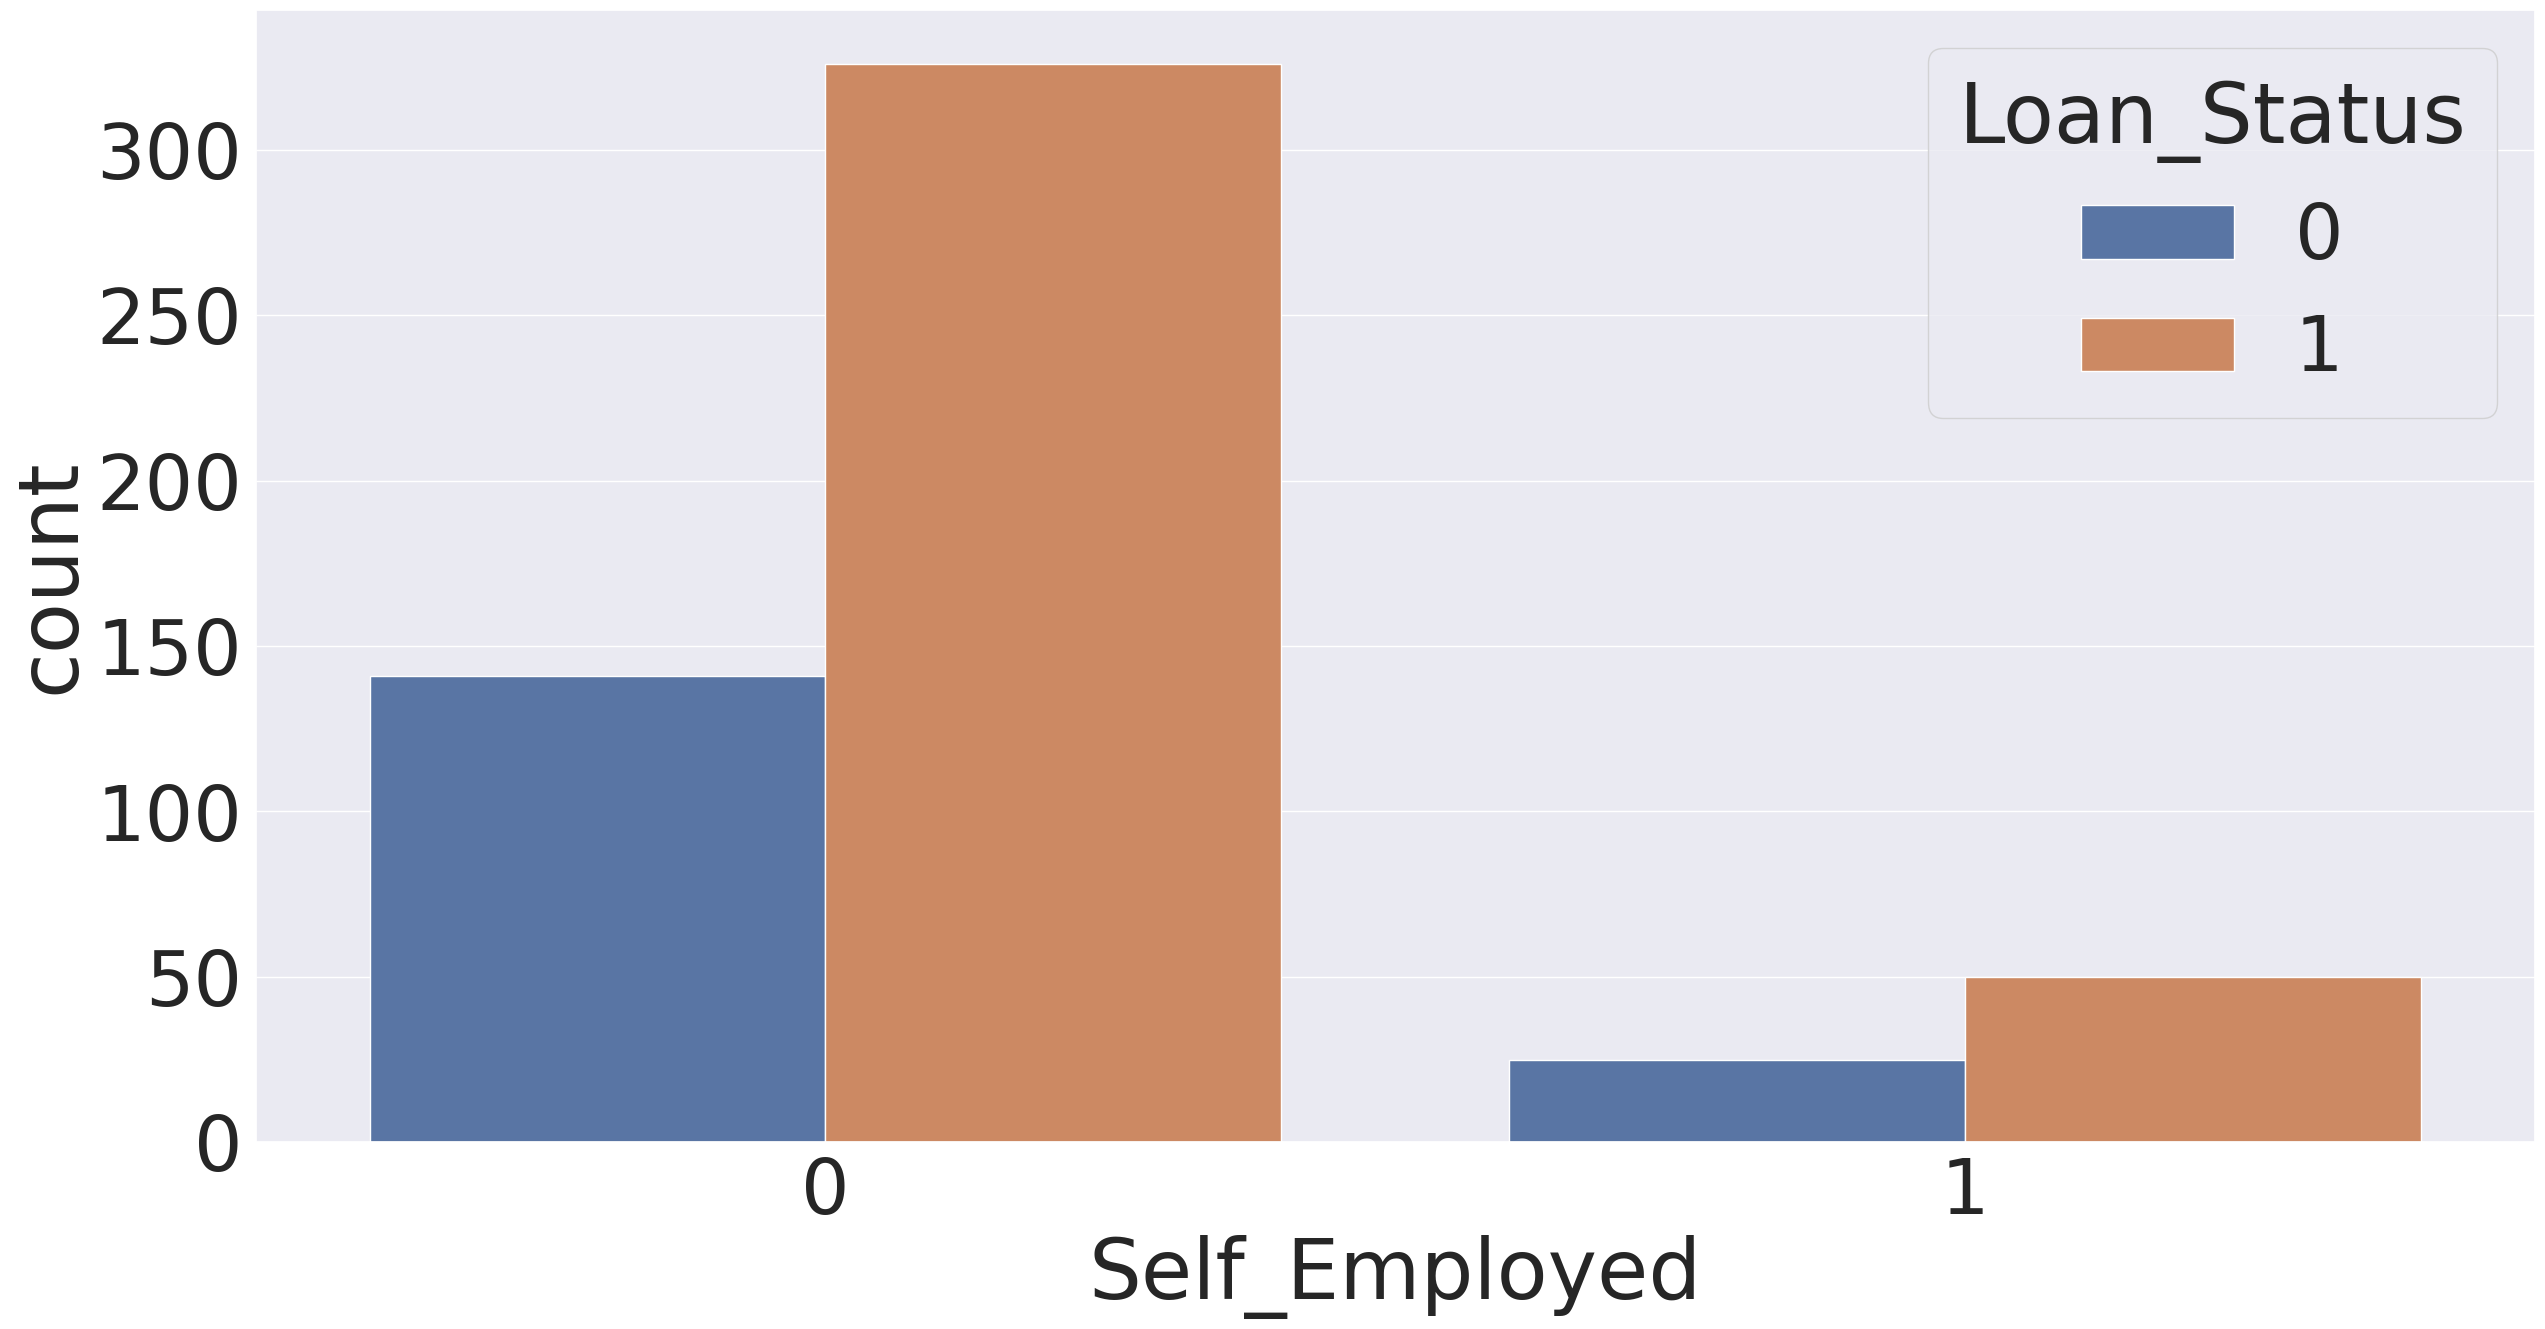

In [175]:
#
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_data)

<Axes: xlabel='Property_Area', ylabel='count'>

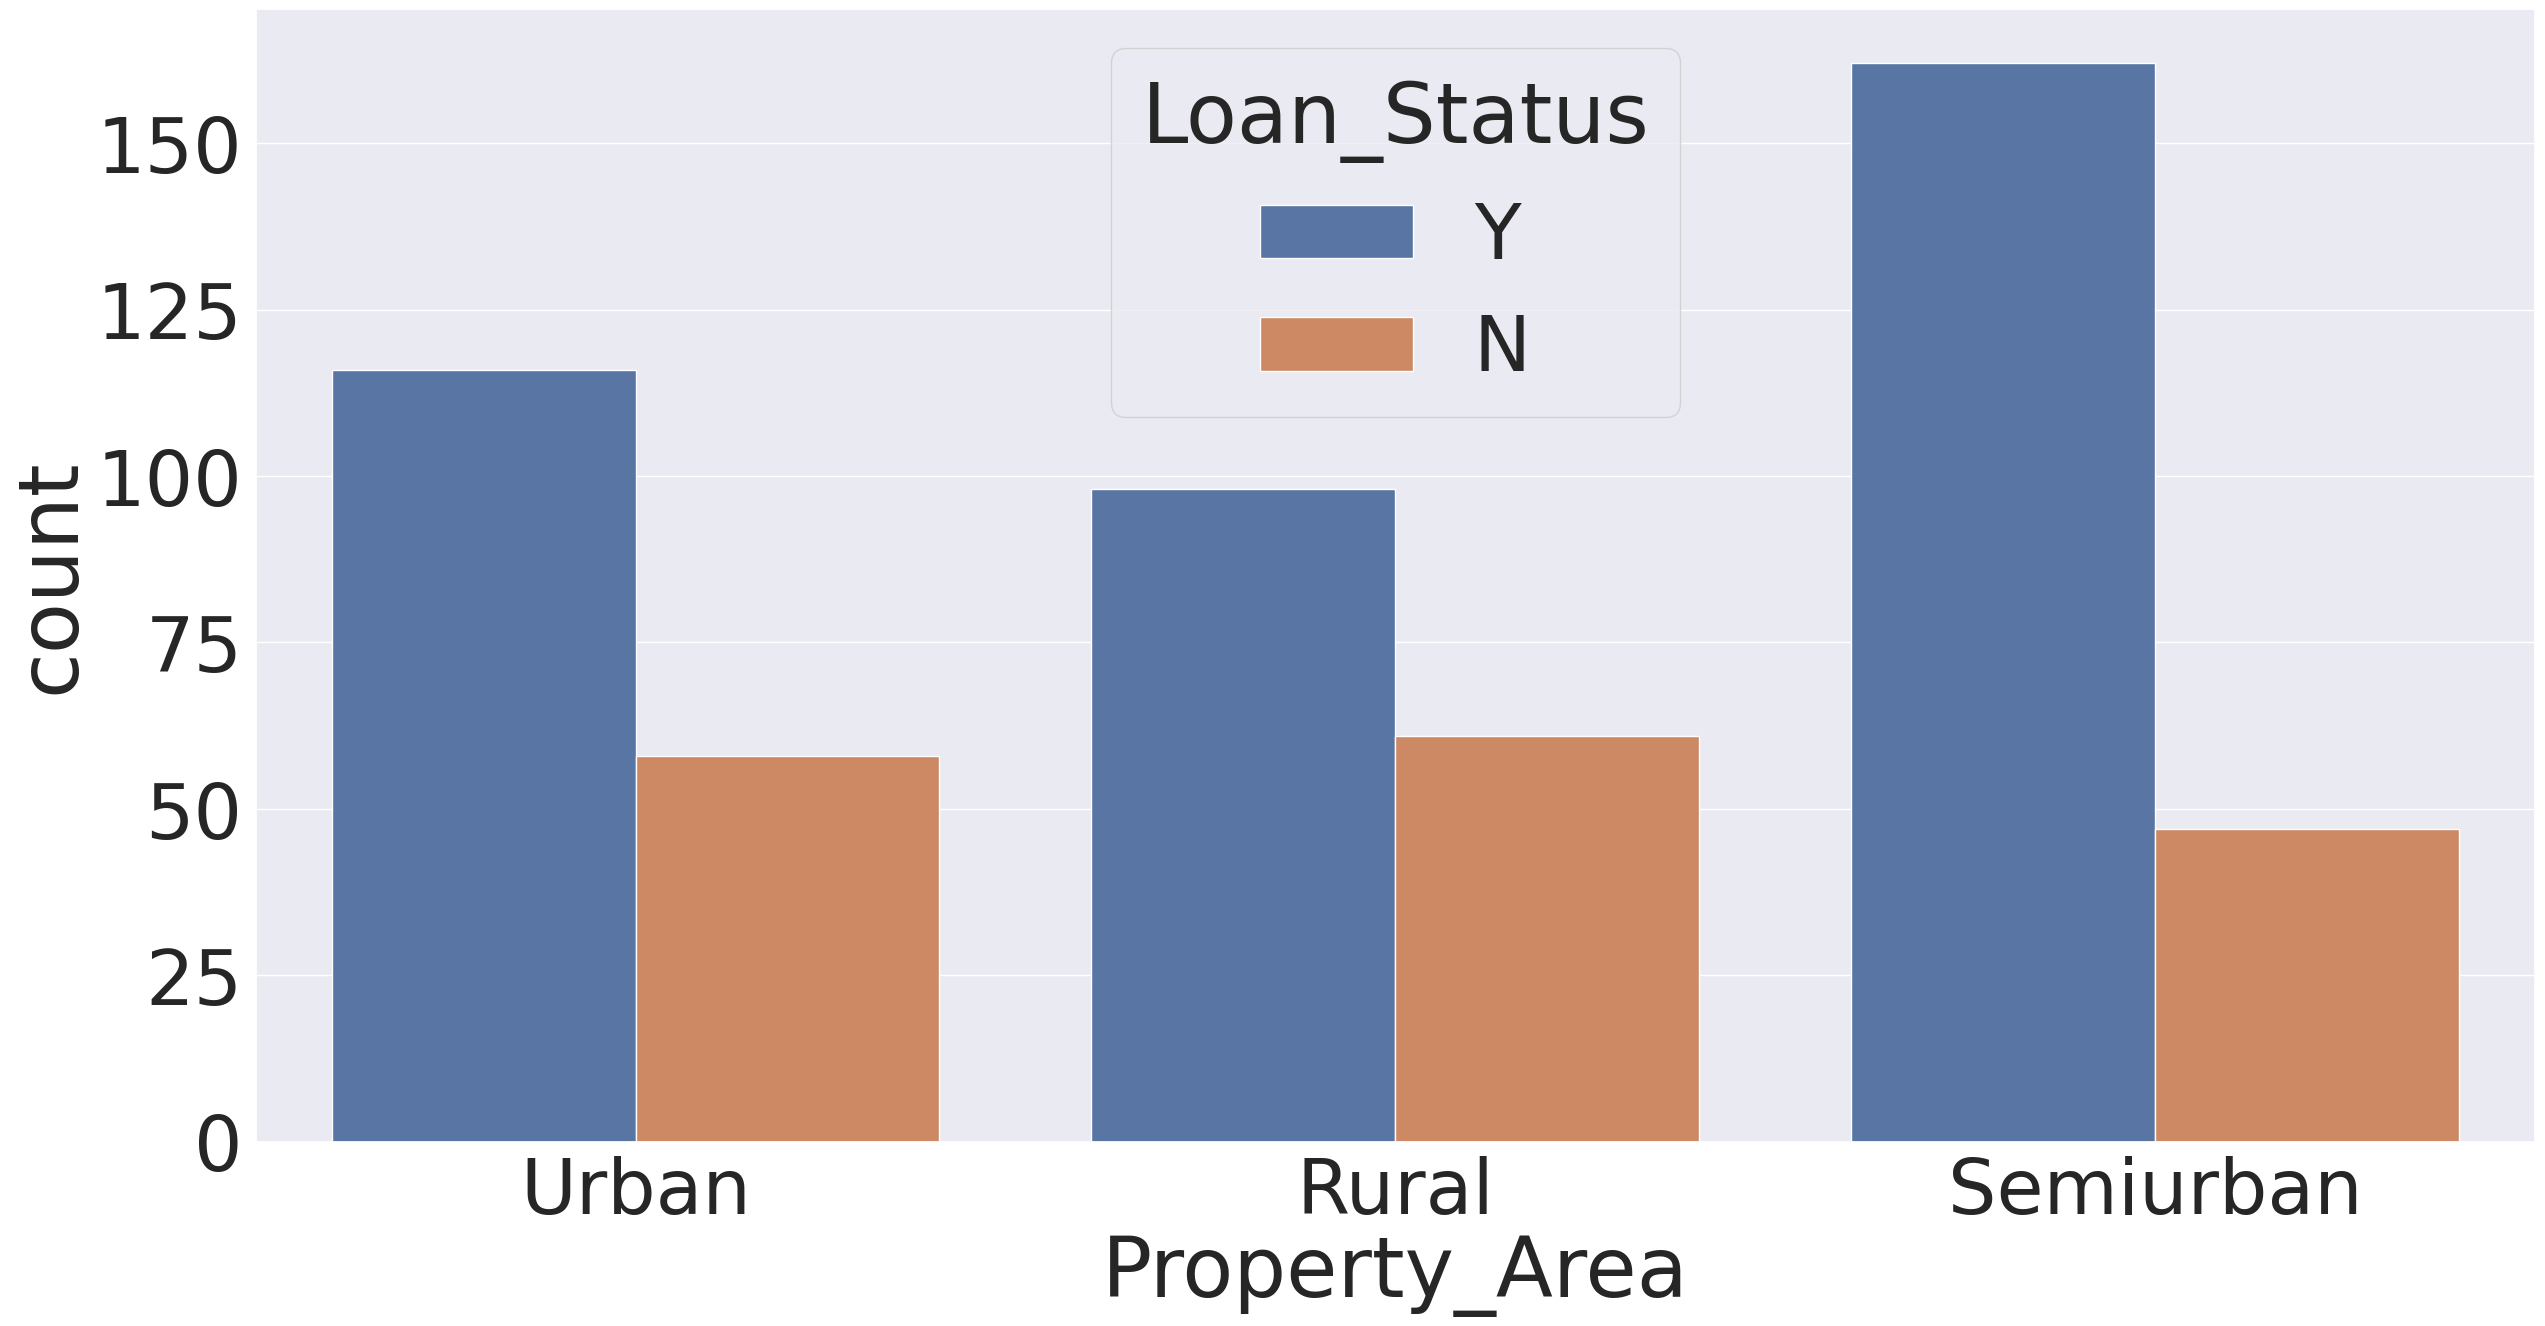

In [151]:
#
plt.figure(figsize=(100,50))
sns.set(font_scale=5)
plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_data)

In [152]:
ld=loan_data['Loan_Status'].replace('Y',1,inplace=True)
ld=loan_data['Loan_Status'].replace('N',0,inplace=True)

In [153]:
loan_data['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [154]:

loan_data['Gender'].replace('Male',1,inplace=True)
loan_data['Gender'].replace('Female',0,inplace=True)
loan_data['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [155]:

loan_data['Married'].replace('Yes',1,inplace=True)
loan_data['Married'].replace('No',0,inplace=True)
loan_data['Married'].value_counts()


1    355
0    187
Name: Married, dtype: int64

In [156]:

loan_data['Dependents'].replace('0',0,inplace=True)
loan_data['Dependents'].replace('1',1,inplace=True)
loan_data['Dependents'].replace('3+',3,inplace=True)
loan_data['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [157]:
#
loan_data['Education'].replace('Graduate',1,inplace=True)
loan_data['Education'].replace('Not Graduate',0,inplace=True)
loan_data['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [158]:


loan_data['Self_Employed'].replace('Yes',1,inplace=True)
loan_data['Self_Employed'].replace('No',0,inplace=True)
loan_data['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [159]:
#
loan_data['Property_Area'].replace('Urban',2,inplace=True)
loan_data['Property_Area'].replace('Rural',1,inplace=True)
loan_data['Property_Area'].replace('Semiurban',0,inplace=True)
loan_data['Property_Area'].value_counts()

0    209
2    174
1    159
Name: Property_Area, dtype: int64

In [160]:
loan_data['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [161]:
loan_data['Loan_Amount_Term'].value_counts()


360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [162]:
loan_data['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

Now,we can see that **Credit_History**(independent variable) has max correlation with **Loan_Status**(dependent variable) hence, **Loan_Status** is dependent on **Credit_History**

In [163]:
#final data frame
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


Importing packages for model

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [165]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
#x is independent n y is dependent variable
X=loan_data.iloc[1:542,1:12].values
y=loan_data.iloc[1:542,12]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [166]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#training logistic regression model with training data
model.fit(X_train, y_train)

LogisticRegression()

Model evaluation

In [167]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)

In [168]:
#manually seeing the training data accuracy
X_train_prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [169]:
#finding accuracy of training data
training_data_accuracy = metrics.accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8095238095238095


In [170]:
#making predictions and finding the accuracy
lr_prediction = model.predict(X_test)
print('Accuracy with logistic regression=',metrics.accuracy_score(lr_prediction,y_test))

Accuracy with logistic regression= 0.7852760736196319


In [171]:
# making prediction on test data
X_test_prediction = model.predict(X_test)

In [172]:
X_test_prediction

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [173]:
#finding accuracy of testing data
test_data_accuracy = metrics.accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7852760736196319


CONCLUSION:
1.By making use of logistic regression algorithm we achieve a maximum accuarcy of 78%.
2.For predictions Loan_Status is heavily dependent on Credit_History.*italicized text*